In [1]:
import sys
sys.path.append('..')
sys.path.append('../../BHS_Persistence/')
sys.path.append('../../BHS_Core/')

from data import * 
from analysis.graph import *
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import ticker
import numpy as np

In [3]:
database = analysis_data_source()

In [4]:
temp = database.temperature_daily_chronology('External')
# temp_ori = database.temperature_chronology_current_day(sensor_location='Chiminey')
# temp_ph = database.temperature_chronology_per_hour_current_day(sensor_location='Chiminey')

In [5]:
temp

NameError: name 'temp_ph' is not defined

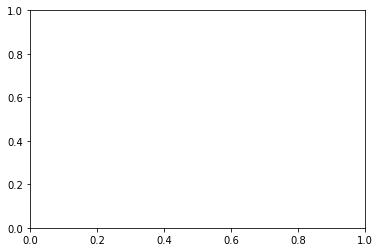

In [6]:
fig, ax = plt.subplots()
# ax.plot(temp_ori['tr_timestamp'], temp_ori['tr_temperature'], linestyle='solid', linewidth=2, label='orginał')
ax.plot(temp_ph['tr_timestamp'], temp_ph['tr_temperature'], linestyle='solid', linewidth=2, label='per-h')
ax.scatter([datetime(2021, 5, 10, 17, 0, 0)], [18], marker='h')
ax.annotate(f'  {18} \u2103', (datetime(2021, 5, 10, 17, 0, 0), 18))
# ax.set_xlabel('Czas')
ax.set_title('Temperatura zewnętrzna')
ax.set_ylabel('\u2103')
# ax.set_ylim(10,40)
ax.set_xlim(datetime(2021, 5, 10, 0, 0, 0), datetime(2021, 5, 11, 0, 0, 0))
ax.xaxis_date()
ax.xaxis.set_major_formatter(DateFormatter('%H'))
ax.xaxis.set_tick_params(labelrotation=90)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax.legend(loc='upper left')


In [3]:
def plot_temp(sensor_loc, show_per_hour = True, show_raw_readings = True):
    _data = analysis_data_source().temperature_daily_chronology(sensor_location=sensor_loc)
    
    fig, ax = plt.subplots()
    last = None
    
    if show_raw_readings:
        ax.plot(_data.get_raw_timeline(), _data.get_raw_temperatures(), linestyle='solid', linewidth=2, label='orginał')
        last = _data.get_raw_last()
    
    if show_per_hour:
        ax.errorbar(_data.get_perhour_timeline(), 
                    _data.get_perhour_temperatures(), 
                    yerr=[_data.get_lower_errors(), _data.get_upper_errors()], 
                    linestyle='solid', 
                    linewidth=2, 
                    elinewidth=1, ecolor='orange', capsize=5,
                    label='per-h')
        if not last:
            last = _data.get_perhour_last()
        
    if last:
        ax.scatter(last[0], last[1], marker='h')
        ax.annotate(f'  {last[1]:.1f} \u2103', last)

    _min = _data.get_min()
    ax.scatter(_min[0], _min[1])
    ax.annotate(f'  {_min[1]:.1f} \u2103', _min)
    _max = _data.get_max()
    ax.scatter(_max[0], _max[1])
    ax.annotate(f'  {_max[1]:.1f} \u2103', _max)
        
    ax.set_title('Temperatura zewnętrzna')
    ax.set_ylabel('\u2103')
    # ax.set_ylim(10,40)
    _now = datetime.now()
    ax.set_xlim(datetime(_now.year, _now.month, _now.day, 0, 0, 0), datetime(_now.year, _now.month, _now.day+1, 0, 0, 0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(DateFormatter('%H'))
    ax.xaxis.set_tick_params(labelrotation=90)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    if show_raw_readings and show_per_hour:
        ax.legend(loc='upper left')

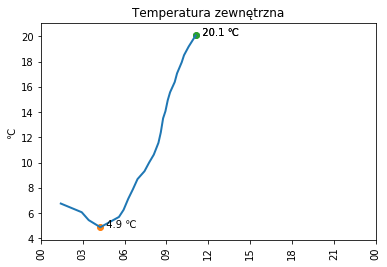

In [4]:
plot_temp('External', show_per_hour=False)

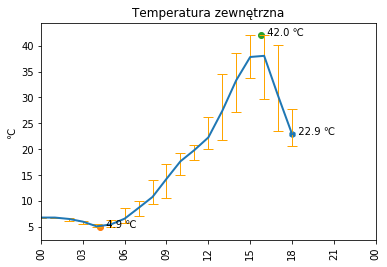

In [4]:
plot_temp('External', show_raw_readings=False)

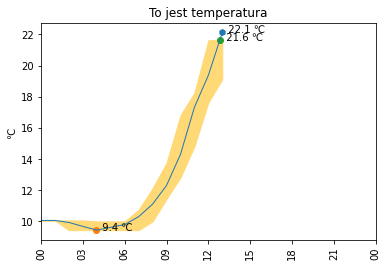

In [2]:
database = analysis_data_source()
g = DailyTemperatureGraph(data_source=database, sensor_loc='External', title='To jest temperatura', style='fill-between')
g.prepare_plot()